<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/3%E7%AB%A0%E5%88%9D%E3%82%81%E3%81%A6%E3%81%AE%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#３章 初めての機械学習

2章では、PyTorchのキモの機能といえる、勾配計算（自動微分）について解説した。<br>
３章では、勾配計算機能を利用して、「線形回帰」と呼ばれる単純な機械学習の問題を解いてみる。<br>

勾配降下法の考え方は、高度なディープラーニングでもまったく同じように使われる最重要な概念



In [1]:
#必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1

In [2]:
#必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# PyTorch関連ライブラリ
import torch
from torchviz import make_dot

In [4]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

In [5]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

## 勾配降下法の実装

In [6]:
def L(u, v):
  return 3 * u**2 + 3 * v**2 - u*v + 7*u - 7*v + 10
def Lu(u, v):
  return 6*u -v + 7
def Lv(u, v):
  return 6*v -u -7

u = np.linspace(-5, 5, 501)
v = np.linspace(-5, 5, 501)
U, V = np.meshgrid(u, v)
Z = L(U, V)

In [8]:
# 勾配降下法のシミュレーション
W = np.array([4.0, 4.0])
W1 = [W[0]]
W2 = [W[1]]
N = 21
alpha = 0.05
for i in range(N):
  W = W - alpha *np.array([Lu(W[0], W[1]), Lv(W[0], W[1])])
  W1.append(W[0])
  W2.append(W[1])

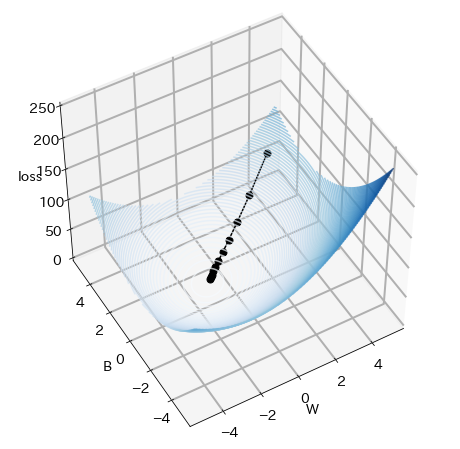

In [9]:
n_loop=11

WW1 = np.array(W1[:n_loop])
WW2 = np.array(W2[:n_loop])
ZZ = L(WW1, WW2)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_zlim(0,250)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('loss')
ax.view_init(50, 240)
ax.xaxis._axinfo["grid"]['linewidth'] = 2.
ax.yaxis._axinfo["grid"]['linewidth'] = 2.
ax.zaxis._axinfo["grid"]['linewidth'] = 2.
ax.contour3D(U, V, Z, 100, cmap='Blues', alpha=0.7)
ax.plot3D(WW1, WW2, ZZ, 'o-', c='k', alpha=1, markersize=7)
plt.show()

## データ前処理
5人の人の身長と体重のデータを使う。<br>
一時関数で身長から体重を予測する場合、最適な直線を求めることが目的。

In [10]:
#サンプルデータの宣言
sampleData1 = np.array([
    [166.0, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [11]:
#機械学習モデルで扱うため、身長だけを抜き出した変数x
#体重だけを抜き出した変数yをセット

x = sampleData1[:,0]
y = sampleData1[:,1]

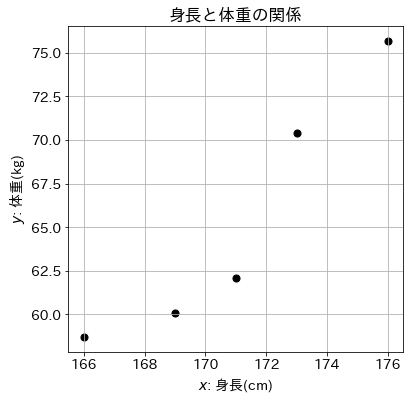

In [12]:
#散布図表示で状況の確認

plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 身長(cm)')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.show()

In [14]:
#座標系の変換
#機械学習モデルでは、データは0に近い値を持つことが望ましい。
#そこで、ｘ,yともに平均値が0になるように並行移動し、新しい座標系をX,Yとする。
X = x - x.mean()
Y = y - y.mean()

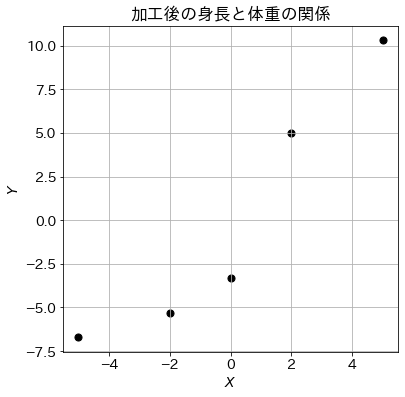

In [15]:
#散布図表示で結果の確認

plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('加工後の身長と体重の関係')
plt.show()

## 予測計算

In [16]:
# XとYをテンソル変数化する

X = torch.tensor(X).float()
Y = torch.tensor(Y).float()

In [17]:
# 結果確認
print(X)
print(Y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [18]:
#重み変数の定義
#WとBは勾配計算するので、requires_grad = Trueとする。
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad = True).float()

In [19]:
#予測関数は一次関数

def pred(X):
  return W * X + B

In [21]:
#予測値の計算
Yp = pred(X)

In [22]:
#結果標示
print(Yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


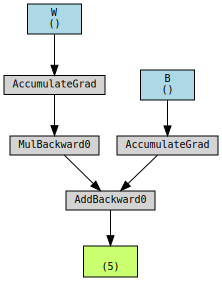

In [23]:
# 予測値の計算グラフ可視化
params = {'W': W, 'B': B}
g = make_dot(Yp,params=params)
display(g)